In [15]:
import pandas as pd
import numpy as np
from modified_spectral_method import *
from modified_louvain_method import *
from proxy_methods import * 
import matplotlib.pyplot as plt

In [2]:
correlation_matrix,T,N,company_names = create_correlation_matrix('eur_data_standardized_returns.csv')   
C_g = calculate_C_g(correlation_matrix,T,N) #Modularity matrix

In [3]:
louvain_communities = modified_louvain(C_g)
louvain_company_communities = map_communities_to_company_names(louvain_communities,company_names)


Detected 3 Initially
Final number of communities: 3


In [4]:
prices_data = pd.read_csv('reshaped_data.csv')
prices_data = prices_data.set_index('Date')
meta_data = pd.read_csv('metadata.csv')
meta_data = meta_data.set_index('Ticker')
sovereign_bond_tickers = meta_data[meta_data['Sector'] == 'Government'].index.tolist()
sovereign_bond_price_data = prices_data[sovereign_bond_tickers]


In [5]:
community_prices_average_df = pd.DataFrame()

for community_number,community in enumerate(louvain_company_communities):

    community_prices = prices_data[community]
    community_prices_average = community_prices.mean(axis=1)
    community_prices_average_df[f"Community {community_number + 1}"] = community_prices_average


community_prices_average_df

,Community 1,Community 2,Community 3
Date,,,
2010-09-14 00:00:00,189.190705,165.622829,134.361013
2010-09-15 00:00:00,187.320139,167.532884,134.924571
2010-09-16 00:00:00,189.869279,168.338796,133.610764
2010-09-17 00:00:00,188.350589,168.540288,132.518580
2010-09-20 00:00:00,190.945471,172.863179,133.163238
...,...,...,...
2020-04-28 00:00:00,122.470646,456.998255,142.550110
2020-04-29 00:00:00,122.314846,456.214539,142.751390
2020-04-30 00:00:00,121.596561,455.404791,140.361122


In [6]:
community_prices_average_df.to_csv('community_prices_average.csv')

# Correlation Matrix
---

In [7]:
#Community 1
time_series_1 = np.array([1, 2, 3, 4, 5])
time_series_2 = np.array([5, 1, 3, 10, 1])
community_1 = [0,1]

#Community 2
time_series_3 = np.array([1, 9, 10, 7, 9])
time_series_4 = np.array([1, 2, 3, 2, 8])
community_2 = [2,3]

time_series_matrix = np.stack((time_series_1, time_series_2,time_series_3, time_series_4), axis=0)


cov_matrix = np.cov(time_series_matrix) 

In [ ]:
# for column in sovereign_bond_price_data.columns:
#     time_series_list = sovereign_bond_price_data[column].tolist()
#     np_time_series = np.array(time_series_list)

merged_df = pd.merge(community_prices_average_df,sovereign_bond_price_data,how='inner',left_index=True,right_index=True)

#Calculate correlation matrix
correlation_matrix2 = merged_df.corr()
    

In [13]:
correlation_matrix2

#Remove first 3 columns
correlation_matrix2 = correlation_matrix2.iloc[:,3:]

#Only keep the first 3 rows
correlation_matrix2 = correlation_matrix2.iloc[:3,:]

In [14]:
correlation_matrix2

,DBR,DENK,ESS,FINL,FRTR,ICELND,IRELND,ITALY,LAZIO,NETHRS,NORWAY,PORTUG,SICILY,SPAIN,SWED,SWISS,UKIN
Community 1,0.872538,0.912240,0.033354,0.861998,0.924704,0.857880,0.831880,0.872990,0.889627,0.933890,0.879946,0.927454,0.936430,0.962597,0.905305,0.947793,0.886365
Community 2,0.032440,0.097788,-0.186212,0.064171,0.010216,-0.217757,0.013582,0.224899,0.210141,0.045936,0.024623,0.009833,0.103520,-0.008425,0.081195,-0.108714,0.072595
Community 3,0.792118,0.823979,0.106253,0.788193,0.835311,0.707850,0.720269,0.849734,0.856189,0.843387,0.852310,0.829946,0.882546,0.871529,0.828247,0.827316,0.831272


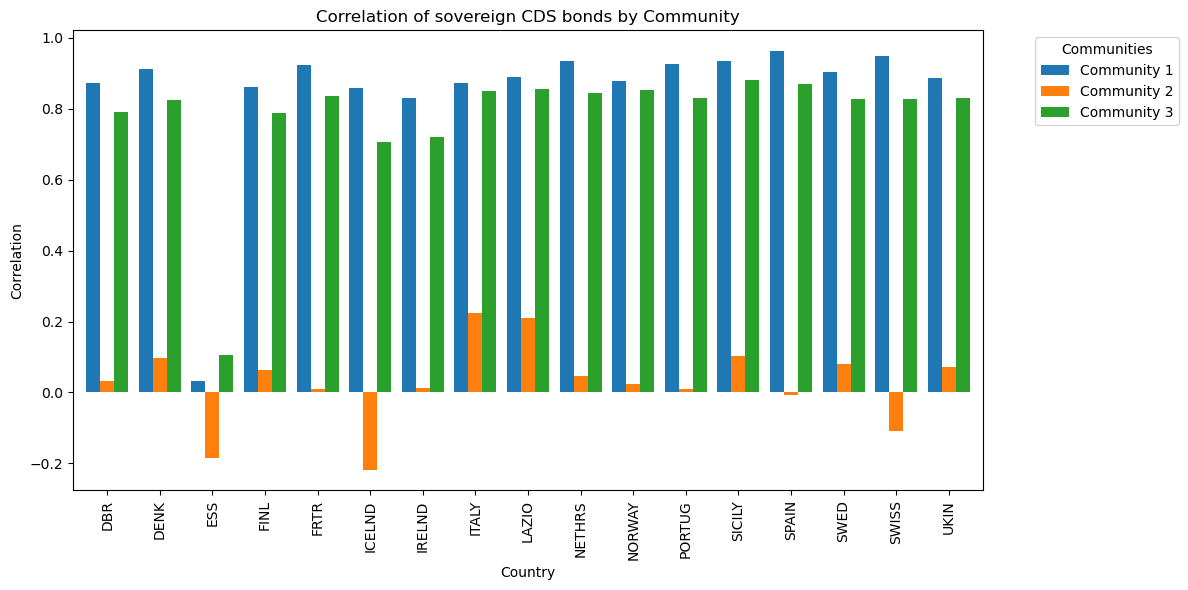

In [19]:
correlation_matrix2.T.plot(kind="bar", figsize=(12, 6), width=0.8)

# Add plot details
plt.title("Correlation of sovereign CDS bonds by Community")
plt.ylabel("Correlation")
plt.xlabel("Country")
plt.legend(title="Communities", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()
